In [1]:
# !/usr/local/bin/pip3.9 install seaborn
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [288]:
def calculate_n(u, t, k):
    ns = ( ((t + (k - 1)*u)/k) * (1 - (t + (k - 1)*u)/k) ) / ( (t*(1-t) )/k)**2
    return ns

max_k = 10
u_vals = [i/10 for i in range(1,10,2)]
t_vals = [i/10 for i in range(1,10,2)]
k_vals = [i/100 for i in range(100,max_k*100,1)]
results = []
for u,t in product(u_vals, t_vals):
    for k in k_vals:
        n_vals = {
            'P_u': u,
            'P_t': t,
            'k': k,
            'n_tag': calculate_n(u, t, k),
            'n': calculate_n(u, t, k=1)
        }
        results.append(n_vals)
            
df = pd.DataFrame(results)
df['n_ratio'] = df['n_tag'] / df['n']
df['n_is_faster'] = (df['n_ratio'] > df['k']**2)
df

,P_u,P_t,k,n_tag,n,n_ratio,n_is_faster
0,0.1,0.1,1.00,11.111111,11.111111,1.0000,False
1,0.1,0.1,1.01,11.334444,11.111111,1.0201,False
2,0.1,0.1,1.02,11.560000,11.111111,1.0404,False
3,0.1,0.1,1.03,11.787778,11.111111,1.0609,True
4,0.1,0.1,1.04,12.017778,11.111111,1.0816,False
...,...,...,...,...,...,...,...
22495,0.9,0.9,9.95,1100.027778,11.111111,99.0025,False
22496,0.9,0.9,9.96,1102.240000,11.111111,99.2016,False
22497,0.9,0.9,9.97,1104.454444,11.111111,99.4009,True
22498,0.9,0.9,9.98,1106.671111,11.111111,99.6004,False


Text(0.5, 0.98, "n'/n ratio by k and P_treated, P_untreated")

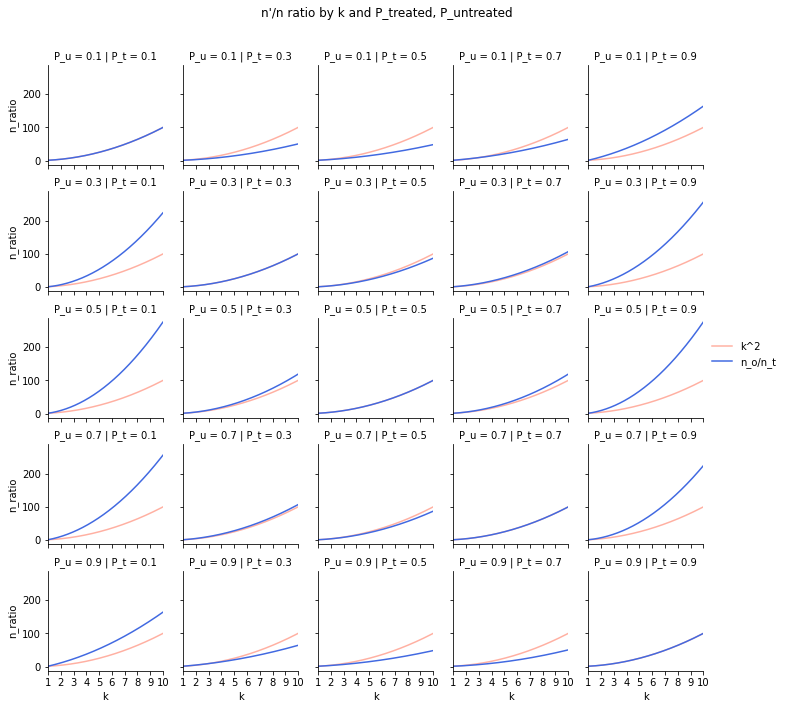

In [287]:
def const_line(*args, **kwargs):
    x = np.arange(1, max_k, .01)
    y = x**2
    plt.plot(x, y, color='tomato', alpha=0.5, label='k^2')
    

g = sns.FacetGrid(data = df.sort_values(by='k'),
                  height=2, aspect=1, col='P_t', 
                  row='P_u', 
                 )
g.map(const_line)
g.map(sns.lineplot, 'k', 'n_ratio', color='royalblue', label="n_o/n_t")
g.add_legend()
g.set(
    xticks=[k for k in range(max_k+1)], 
    xlim=(1,max_k)
)
plt.subplots_adjust(top=0.9) 
g.fig.suptitle("n'/n ratio by k and P_treated, P_untreated")